# Time Series Advanced - Prophet Forecasting

In [25]:
!pip install neuralprophet


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

In [33]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

df['Month'] = pd.to_datetime(df['Month'])
df.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (144, 2)
          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


## Visualization

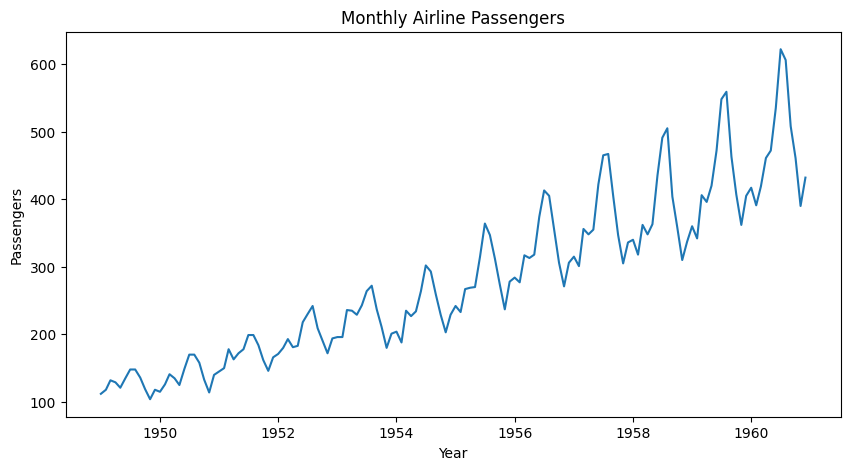

In [34]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'])
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()



## Prophet Model Fitting

In [35]:
model = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

# ✅ Fit model
metrics = model.fit(df, freq='M')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number                     for the learning rate finder (209). The results might not be optimal.
Finding best initial lr: 100%|██████████| 209/209 [00:01<00:00, 105.99it/s]


Training: |          | 0/? [00:29<?, ?it/s, v_num=2, train_loss=0.00415, reg_loss=0.000, MAE=17.00, RMSE=22.10, Loss=0.00415, RegLoss=0.000]


## Forecasting

In [36]:
future = model.make_future_dataframe(df, periods=12)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.09it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


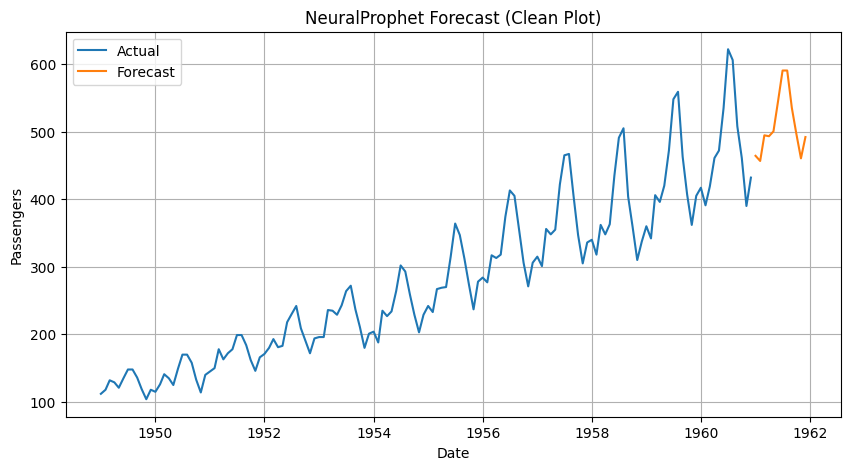

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'], label="Actual")
plt.plot(forecast['ds'], forecast['yhat1'], label="Forecast")
plt.title("NeuralProphet Forecast (Clean Plot)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()



In [38]:
components = model.predict_components(forecast)

plt.figure(figsize=(10,4))
plt.plot(components['ds'], components['trend'])
plt.title("Trend Component")
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(components['ds'], components['season_yearly'])
plt.title("Yearly Seasonality")
plt.grid()
plt.show()


AttributeError: 'NeuralProphet' object has no attribute 'predict_components'